## This plot shows that metabolites selected for the project are among the most abundant ones in E.Coli

In [29]:
from pathlib import Path
from definitions import ROOT_DIR
import pandas as pd
import numpy as np
import seaborn as sns

- Inputs

In [30]:
p_root_dir = Path(ROOT_DIR).parent
p_analysis = p_root_dir / "6_plots\q1_plots"

# Compunds used in the study
p_compounds = p_root_dir / "5_data_analysis/compounds_ids.csv"

# Mapping to absolute metabolite abundance in E.Coli (Bennett, ... , Rabinowitz, 2009)
p_abundance = p_root_dir / "5_data_analysis/absolute_abundance.csv"

- Load data

In [31]:
compounds = pd.read_csv(p_compounds, index_col='internal_id')
# Remove entries for thermometer ions and fiducials
compounds = compounds[compounds.hmdb_primary != 'custom'][['name_short', 'hmdb_primary']]

abundance = pd.read_csv(p_abundance)
abundance['logC'] = np.log10(abundance["Concentration / M"])
abundance['covered'] = ~abundance.name_short.isna()
abundance.sort_values(by="Concentration / M", ascending=False, inplace=True)

[[],
 Text(0.5, 0, 'Most abundant metabolites in E.Coli'),
 Text(0, 0.5, 'Log10 absolute concentration of metaboilites'),
 Text(0.5, 1.0, 'Coverage of most abundant metabolites')]

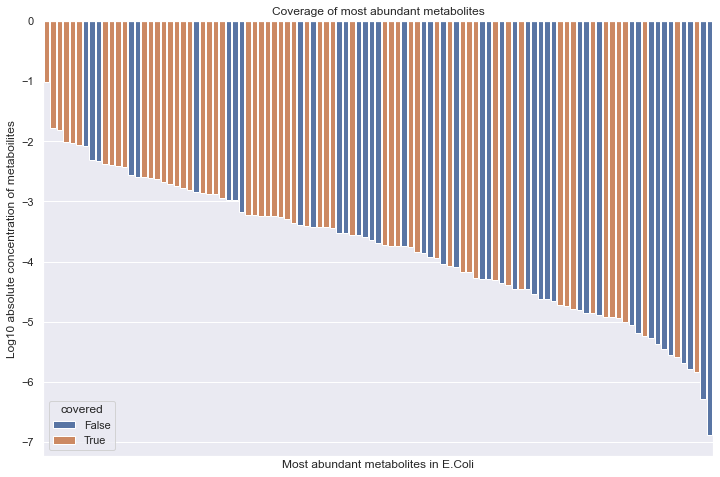

In [32]:
sns.set(rc={'figure.figsize':(12, 8)})
ax = sns.barplot(x="Name in paper", y="logC", hue="covered",
                 data=abundance, dodge=False)
ax.set(xticks=[], xlabel='Most abundant metabolites in E.Coli', ylabel='Log10 absolute concentration of metaboilites', title='Coverage of most abundant metabolites')

In [35]:
ax.figure.savefig(p_analysis / f"abundance_plot.png")